In [1]:
# importando bibliotecas
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split, learning_curve
#usada para o pré-processamento de daddos, minmax e standard para dimensionar e padronizar e o onehot para codificar variáveis em formato numérico
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
#classificador redes neurais com MLP
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, f1_score
from sklearn import metrics
import numpy as np
import io
from google.colab import files
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import RocCurveDisplay
import logging
from joblib import Parallel, delayed

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dt = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PROJETO FINAL - IOT/database_iot_pf.csv')

In [4]:
target_names = dt['label'].value_counts()
target_names = target_names.index.tolist()
print(target_names)

[3, 2, 0, 1]


In [5]:
# dt.info()

print(target_names)

[3, 2, 0, 1]


In [6]:
dt.head()

,lux,humidity,temperature,lighting_switch,climate_switch,door_actuator,lux_status,humidity_status,temperature_status,environment_temperature,environment_lux,label
0,108.385419,50.247112,47.334662,1,1,1,1,1,0,19,400,3
1,86.984219,74.412700,67.968519,1,1,1,1,1,1,24,300,3
2,227.617681,62.304369,71.416293,1,1,1,1,1,1,21,450,3
3,140.915569,58.082378,55.103730,1,1,1,1,1,0,16,250,3
4,233.051872,71.323435,58.827894,1,0,1,1,1,1,25,300,3


In [7]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018517 entries, 0 to 1018516
Data columns (total 12 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   lux                      1018517 non-null  float64
 1   humidity                 1018517 non-null  float64
 2   temperature              1018517 non-null  float64
 3   lighting_switch          1018517 non-null  int64  
 4   climate_switch           1018517 non-null  int64  
 5   door_actuator            1018517 non-null  int64  
 6   lux_status               1018517 non-null  int64  
 7   humidity_status          1018517 non-null  int64  
 8   temperature_status       1018517 non-null  int64  
 9   environment_temperature  1018517 non-null  int64  
 10  environment_lux          1018517 non-null  int64  
 11  label                    1018517 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 93.2 MB


In [8]:
# Número de features
inputs = len(dt.columns)-1
print(inputs)

11


In [9]:
# Modelo de MLP para classificação criado
mlp_clf = MLPClassifier(hidden_layer_sizes=(inputs,32,16,4),
                        max_iter = 100,activation = 'logistic',
                        solver = 'adam',learning_rate = 'adaptive',
                        learning_rate_init = 0.007, early_stopping = True,
                        verbose=True)

In [10]:
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(dt.drop(['label'],axis=1), dt['label'], test_size=0.1, shuffle=True)

In [11]:
full_pipe = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler()),
    ('mlp', mlp_clf)
])

In [12]:
# Realizando o treinamento
full_pipe.fit(X_train,y_train)

Iteration 1, loss = 0.24581975
Validation score: 0.988000
Iteration 2, loss = 0.06092107
Validation score: 0.988644
Iteration 3, loss = 0.06061659
Validation score: 0.986473
Iteration 4, loss = 0.05904999
Validation score: 0.988524
Iteration 5, loss = 0.04536821
Validation score: 0.989822
Iteration 6, loss = 0.03802312
Validation score: 0.991862
Iteration 7, loss = 0.03650422
Validation score: 0.991185
Iteration 8, loss = 0.03526219
Validation score: 0.988840
Iteration 9, loss = 0.03424892
Validation score: 0.990804
Iteration 10, loss = 0.03311472
Validation score: 0.990225
Iteration 11, loss = 0.03255114
Validation score: 0.989385
Iteration 12, loss = 0.03101202
Validation score: 0.993662
Iteration 13, loss = 0.03013913
Validation score: 0.994807
Iteration 14, loss = 0.02949810
Validation score: 0.991611
Iteration 15, loss = 0.02872426
Validation score: 0.991109
Iteration 16, loss = 0.02766138
Validation score: 0.992353
Iteration 17, loss = 0.02692655
Validation score: 0.993236
Iterat

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('mlp',
                 MLPClassifier(activation='logistic', early_stopping=True,
                               hidden_layer_sizes=(11, 32, 16, 4),
                               learning_rate='adaptive',
                               learning_rate_init=0.007, max_iter=100,
                               verbose=True))])

In [13]:
# Usando preditor para os dados de treino
y_train_pred = full_pipe.predict(X_train)
print(y_train_pred)

[1 0 2 ... 3 2 2]


In [14]:
y_train_score = full_pipe.score(X_train, y_train)
print(y_train_score)

0.9957781741421348


In [15]:
# Usando o preditor nos dados de teste
y_test_pred = full_pipe.predict(X_test)
print(y_test_pred)

[1 3 0 ... 2 0 1]


In [16]:
# Observando a acurácia do modelo nos dados de teste
y_test_score = full_pipe.score(X_test, y_test)
print(y_test_score)

0.9955818246082551


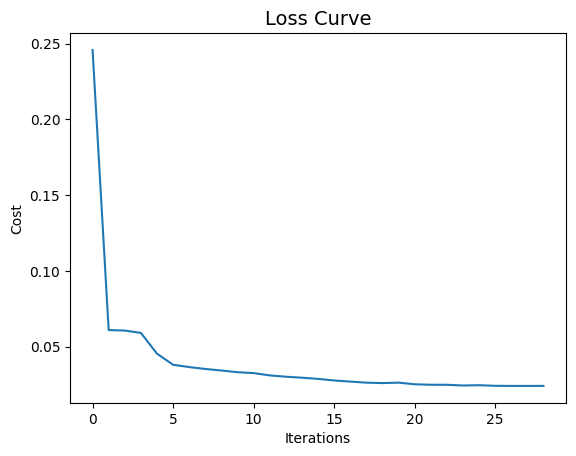

In [17]:
# Curva de perdas do melhor modelo
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [18]:
print(
    f"Classification report for classifier {mlp_clf}:\n"
    f"{metrics.classification_report(y_test, y_test_pred)}\n"
)

Classification report for classifier MLPClassifier(activation='logistic', early_stopping=True,
              hidden_layer_sizes=(11, 32, 16, 4), learning_rate='adaptive',
              learning_rate_init=0.007, max_iter=100, verbose=True):
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     25503
           1       0.99      1.00      1.00     20364
           2       1.00      0.99      0.99     27151
           3       0.99      1.00      1.00     28834

    accuracy                           1.00    101852
   macro avg       1.00      1.00      1.00    101852
weighted avg       1.00      1.00      1.00    101852




Matriz de confusão:
[[25301   128    74     0]
 [    2 20338     0    24]
 [    9     0 26930   212]
 [    0     1     0 28833]]


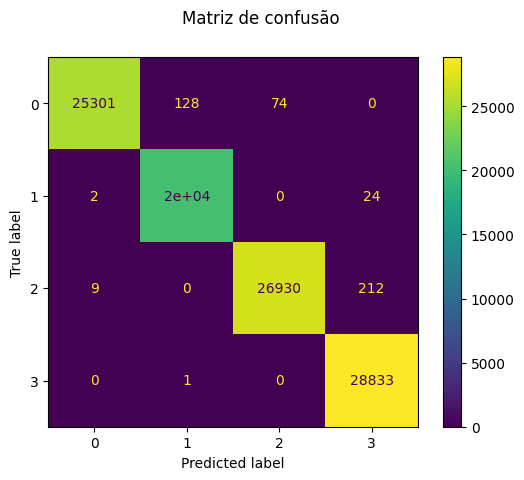

In [19]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
disp.figure_.suptitle("Matriz de confusão")
print(f"Matriz de confusão:\n{disp.confusion_matrix}")

plt.show()

In [20]:
import joblib

joblib.dump(full_pipe,'/content/drive/MyDrive/Colab Notebooks/PROJETO FINAL - IOT/mlp_smart_enviroument.joblib')

['/content/drive/MyDrive/Colab Notebooks/PROJETO FINAL - IOT/mlp_smart_enviroument.joblib']

In [21]:
m = joblib.load('/content/drive/MyDrive/Colab Notebooks/PROJETO FINAL - IOT/mlp_smart_enviroument.joblib')

In [22]:
# lux | humidity | temperature | ligthing_switch | climate_switch | door_actuator | lux_status | humidity_status
# temperature_status | enviroument_temperature | enviroument_lux
# testando dados
features = [286, 50, 30, 1, 1, 1, 1, 1, 1, 25, 300]

# convertendo para array
features_array = np.array([features])

# Prevendo a saída
prediction = m.predict(features_array)

# Mostrando o resultado
print(prediction)


[3]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [23]:
import numpy as np
import sklearn
import joblib

print("NumPy version:", np.__version__)
print("scikit-learn version:", sklearn.__version__)
print("joblib version:", joblib.__version__)


NumPy version: 1.25.2
scikit-learn version: 1.2.2
joblib version: 1.4.2
